# Pixel Shifting

1. Get all image edges with diff, where
   1. Categorize in to rising (>1) and falling edges (<1)
1. Arrange all edges into a big vector
1. ''Annotate'' the big vector with additional vectors
   - (rising edge)
   - (falling edge)
   - row number
   - 


In [163]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [66]:
test_image = np.zeros((16, 16), dtype=int)
test_image[1:4, :8] = 1
test_image[4, :] = 1
test_image[5:8, 8:] = 1
test_image[8:12, (8-2):(8+2)] = 1
test_image[8:12, (8-1):(8+1)] = 2
test_image[12:,  np.arange(8) * 2] = 1

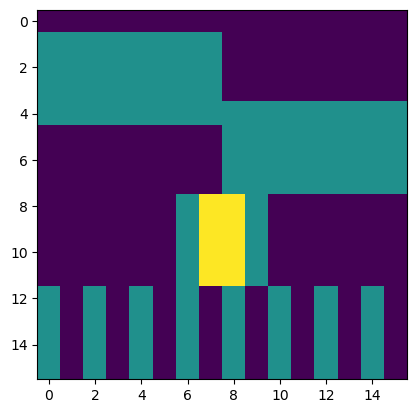

In [67]:
plt.imshow(test_image)

In [68]:
x = test_image
diff_arr = np.diff(x.astype(int), axis=1)
diff_arr

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  1,  0, -1, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  1,  0, -1, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  1,  0, -1, -1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  1,  0, -1, -1,  0,  0,  0,  0,  0],
       [-1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1],
       [-1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1],
       [-1,  1, -1,  1, -1,  1, -1

In [69]:
edge_index_tup = np.where(diff_arr != 0)
edge_index_tup_vec = tuple(i.ravel() for i in edge_index_tup)
e_row_vec, e_vec = edge_index_tup_vec
e_right_vec = e_vec + 1
e_diff_vec = diff_arr[edge_index_tup_vec]
e_left_val = x[edge_index_tup_vec]
e_right_val = x[e_row_vec, e_right_vec]

print('e_vec, e_row_vec, e_diff_vec, e_left_val, e_right_val')
e_vec, e_row_vec, e_diff_vec, e_left_val, e_right_val

e_vec, e_row_vec, e_diff_vec, e_left_val, e_right_val


(array([ 7,  7,  7,  7,  7,  7,  5,  6,  8,  9,  5,  6,  8,  9,  5,  6,  8,
         9,  5,  6,  8,  9,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,
        12, 13, 14,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
        14,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,  0,
         1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
       dtype=int64),
 array([ 1,  2,  3,  5,  6,  7,  8,  8,  8,  8,  9,  9,  9,  9, 10, 10, 10,
        10, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15,
        15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15],
       dtype=int64),
 array([-1, -1, -1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1,  1, -1,
        -1,  1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1,
        -1,  1, -1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, 

In [70]:
is_re_vec = e_diff_vec > 0
is_fe_vec = np.logical_not(is_re_vec)

print('is_re_vec, is_fe_vec')
is_re_vec, is_fe_vec

is_re_vec, is_fe_vec


(array([False, False, False,  True,  True,  True,  True,  True, False,
        False,  True,  True, False, False,  True,  True, False, False,
         True,  True, False, False, False,  True, False,  True, False,
         True, False,  True, False,  True, False,  True, False,  True,
        False, False,  True, False,  True, False,  True, False,  True,
        False,  True, False,  True, False,  True, False, False,  True,
        False,  True, False,  True, False,  True, False,  True, False,
         True, False,  True, False, False,  True, False,  True, False,
         True, False,  True, False,  True, False,  True, False,  True,
        False]),
 array([ True,  True,  True, False, False, False, False, False,  True,
         True, False, False,  True,  True, False, False,  True,  True,
        False, False,  True,  True,  True, False,  True, False,  True,
        False,  True, False,  True, False,  True, False,  True, False,
         True,  True, False,  True, False,  True, False,  Tr

In [71]:
cumsum_raw_vec = np.cumsum(e_diff_vec)
cumsum_raw_vec

array([-1, -2, -3, -2, -1,  0,  1,  2,  1,  0,  1,  2,  1,  0,  1,  2,  1,
        0,  1,  2,  1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0,
       -1,  0, -1, -2, -1, -2, -1, -2, -1, -2, -1, -2, -1, -2, -1, -2, -1,
       -2, -3, -2, -3, -2, -3, -2, -3, -2, -3, -2, -3, -2, -3, -2, -3, -4,
       -3, -4, -3, -4, -3, -4, -3, -4, -3, -4, -3, -4, -3, -4])

In [72]:
post_row_break_locs = np.where(np.diff(e_row_vec, prepend=-1) > 0)[0]
post_row_break_rows = e_row_vec[post_row_break_locs]
first_row_vals = x[:, 0]

post_row_break_locs, post_row_break_rows, first_row_vals

(array([ 0,  1,  2,  3,  4,  5,  6, 10, 14, 18, 22, 37, 52, 67],
       dtype=int64),
 array([ 1,  2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
       dtype=int64),
 array([0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]))

In [73]:
cum_sum_adj = np.repeat(np.nan, e_row_vec.max() + 1)
cum_sum_adj[post_row_break_rows] = (
    1 
    - first_row_vals[post_row_break_rows] 
    - cumsum_raw_vec[post_row_break_locs])
cum_sum_adj = cum_sum_adj.astype(int)
cum_sum_adj

array([-2147483648,           1,           2,           3, -2147483648,
                 3,           2,           1,           0,           0,
                 0,           0,           1,           2,           3,
                 4])

In [74]:
cum_sum_adj_vec = cum_sum_adj[e_row_vec]
cum_sum_adj_vec

array([1, 2, 3, 3, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4])

In [75]:
cum_sum_vec = cumsum_raw_vec + cum_sum_adj_vec
e_row_vec, cum_sum_vec, e_right_val

(array([ 1,  2,  3,  5,  6,  7,  8,  8,  8,  8,  9,  9,  9,  9, 10, 10, 10,
        10, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
        12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13,
        13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15,
        15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15],
       dtype=int64),
 array([0, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]),
 array([0, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
        0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]))

In [104]:
diff_vec_raw = np.diff(e_vec, append=0)
diff_vec_raw

array([  0,   0,   0,   0,   0,  -2,   1,   2,   1,  -4,   1,   2,   1,
        -4,   1,   2,   1,  -4,   1,   2,   1,  -9,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1, -14,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1, -14,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1, -14,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1, -14], dtype=int64)

In [112]:
pre_row_break_locs = post_row_break_locs[1:] - 1
pre_row_break_locs_reg = np.append(pre_row_break_locs, diff_vec_raw.size - 1)
diff_vec_raw[pre_row_break_locs_reg]

array([  0,   0,   0,   0,   0,  -2,  -4,  -4,  -4,  -9, -14, -14, -14,
       -14], dtype=int64)

In [113]:
widths = diff_vec_raw.copy()
width_row_end_correction = x.shape[1] - e_right_vec[pre_row_break_locs_reg]
widths[pre_row_break_locs_reg] = (
    widths[pre_row_break_locs_reg] 
    + width_row_end_correction 
    - diff_vec_raw[pre_row_break_locs_reg])
width_row_end_correction, width_vec

(array([8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 1, 1, 1, 1], dtype=int64),
 array([8, 8, 8, 8, 8, 8, 1, 2, 1, 6, 1, 2, 1, 6, 1, 2, 1, 6, 1, 2, 1, 6,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))

In [114]:
region_widths = np.insert(widths, post_row_break_locs, e_right_vec[post_row_break_locs])
region_widths, region_widths.size

(array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 1, 2, 1, 6, 6, 1, 2, 1, 6,
        6, 1, 2, 1, 6, 6, 1, 2, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1], dtype=int64),
 96)

(array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 2, 1, 0,
        0, 1, 2, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 0, 1, 0]),
 array([-1,  1, -1,  1, -1,  0,  1, -1,  1, -1,  1, -1,  1,  1, -1, -1,  0,
         1,  1, -1, -1,  0,  1,  1, -1, -1,  0,  1,  1, -1, -1,  1, -1,  1,
        -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
         1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1,
        -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,  1, -1,
         1, -1,  1, -1,  1, -1,  1, -1,  1, -1]),
 96,
 array([ 0,  8,  0,  8,  0,  8,  0,  8,  0,  8,  0,  8,  0,  6,  7,  9, 10,
         0,  6,  7,  9, 10,  0,  6,  7,  9, 10,  0,  6,  7,  9, 10,  0,  1,
         2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,  0,  1,  2,
       

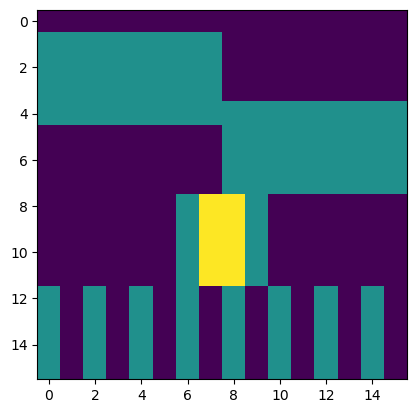

In [152]:
region_vals = np.insert(e_right_val, 
                        post_row_break_locs, 
                        first_row_vals[post_row_break_rows])
region_begin_cols = np.insert(e_right_vec,
                              post_row_break_locs,
                              0)
region_end_cols = region_begin_cols + region_widths
region_rows = np.insert(e_row_vec,
                        post_row_break_locs,
                        post_row_break_rows)
region_delta_trim = np.diff(region_vals)
plt.imshow(test_image)
region_vals, region_delta_trim, region_vals.size, region_begin_cols, region_end_cols, region_rows

In [137]:
post_row_break_locs_reg = (
    post_row_break_locs 
    + np.arange(post_row_break_locs.size))
pre_row_break_locs_reg = post_row_break_locs_reg[1:] - 1
pre_row_break_locs_reg = np.append(
    pre_row_break_locs_reg,
    region_widths.size - 1)
all_row_break_locs_reg = np.concatenate([post_row_break_locs_reg, pre_row_break_locs_reg])
post_row_break_locs_reg, pre_row_break_locs_reg, all_row_break_locs_reg

(array([ 0,  2,  4,  6,  8, 10, 12, 17, 22, 27, 32, 48, 64, 80],
       dtype=int64),
 array([ 1,  3,  5,  7,  9, 11, 16, 21, 26, 31, 47, 63, 79, 95],
       dtype=int64),
 array([ 0,  2,  4,  6,  8, 10, 12, 17, 22, 27, 32, 48, 64, 80,  1,  3,  5,
         7,  9, 11, 16, 21, 26, 31, 47, 63, 79, 95], dtype=int64))

Want to categorize every region into
* well
* step
* plateau

(array([False,  True, False,  True, False,  True,  True, False,  True,
        False,  True, False,  True, False, False, False,  True,  True,
        False, False, False,  True,  True, False, False, False,  True,
         True, False, False, False,  True, False,  True, False,  True,
        False,  True, False,  True, False,  True, False,  True, False,
         True, False,  True, False,  True, False,  True, False,  True,
        False,  True, False,  True, False,  True, False,  True, False,
         True, False,  True, False,  True, False,  True, False,  True,
        False,  True, False,  True, False,  True, False,  True, False,
         True, False,  True, False,  True, False,  True, False,  True,
        False,  True, False,  True, False,  True]),
 array([ True, False,  True, False,  True, False, False,  True, False,
         True, False,  True, False, False,  True, False, False, False,
        False,  True, False, False, False, False,  True, False, False,
        False, False,  Tr

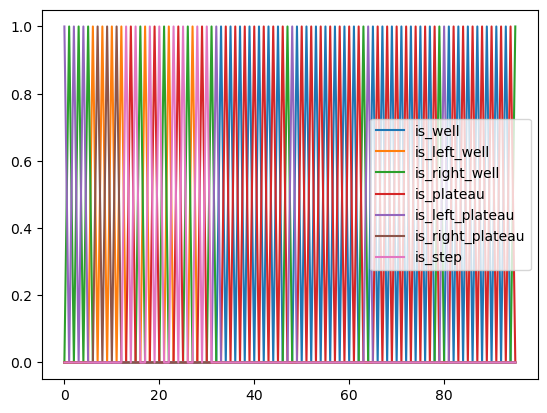

In [141]:
rising_edge_trim = region_delta_trim > 0
is_left_rising = np.insert(rising_edge_trim, 0, False)
is_right_rising = np.append(rising_edge_trim, False)
is_left_falling = np.logical_not(is_left_rising)
is_right_falling = np.logical_not(is_right_rising)

is_center_well = np.logical_and(is_left_falling, is_right_rising)
is_center_well[all_row_break_locs_reg] = False
is_left_well = np.zeros(is_center_well.shape, dtype=bool)
is_left_well[post_row_break_locs_reg] = is_right_rising[post_row_break_locs_reg]
is_right_well = np.zeros(is_center_well.shape, dtype=bool)
is_right_well[pre_row_break_locs_reg] = is_left_falling[pre_row_break_locs_reg]
is_center_plateau = np.logical_and(is_left_rising, is_right_falling)
is_center_plateau[all_row_break_locs_reg] = False
is_left_plateau = np.zeros(is_center_well.shape, dtype=bool)
is_left_plateau[post_row_break_locs_reg] = np.logical_not(
    is_left_well[post_row_break_locs_reg])
is_right_plateau = np.zeros(is_center_well.shape, dtype=bool)
is_right_plateau[pre_row_break_locs_reg] = np.logical_not(
    is_right_well[pre_row_break_locs_reg])
is_step = np.logical_or(
    np.logical_and(is_left_falling, is_right_falling),
    np.logical_and(is_left_rising, is_right_rising))
is_step[all_row_break_locs_reg] = False
plt.plot(is_center_well, label='is_well')
plt.plot(is_left_well, label='is_left_well')
plt.plot(is_right_well, label='is_right_well')
plt.plot(is_center_plateau, label='is_plateau')
plt.plot(is_left_plateau, label='is_left_plateau')
plt.plot(is_right_plateau, label='is_right_plateau')
plt.plot(is_step, label='is_step')
plt.legend()
is_well, is_plateau, is_step

Identified 32 region(s) w/ pixel value > 0 which will be lost when performing the pixel shift because the region(s) have width <= 12 pixels. This is too narrow given the supplided shift parameters (rising_edge_shift=10, falling_edge_shift=-2). Note that adjacent pixel regions may be lost or clipped as well.
Failed Regions located at the following pixel locations [row, cols]:
   0: [   8,    7:9   ], width =    2
   1: [   9,    7:9   ], width =    2
   2: [  10,    7:9   ], width =    2
   3: [  11,    7:9   ], width =    2
   4: [  12,    2:3   ], width =    1
   5: [  12,    4:5   ], width =    1
   6: [  12,    6:7   ], width =    1
   7: [  12,    8:9   ], width =    1
   8: [  12,   10:11  ], width =    1
   9: [  12,   12:13  ], width =    1
  10: [  12,   14:15  ], width =    1
  11: [  13,    2:3   ], width =    1
  12: [  13,    4:5   ], width =    1
  13: [  13,    6:7   ], width =    1
  14: [  13,    8:9   ], width =    1
  15: [  13,   10:11  ], width =    1
  16: [  13,  

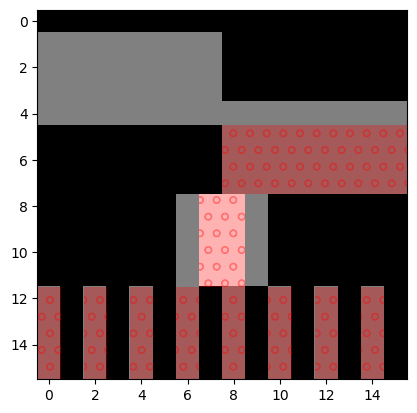

In [180]:
rising_shift = +10
falling_shift = -2

safe_center_plateau_width = rising_shift - falling_shift
safe_center_well_width = -safe_center_plateau_width
safe_right_plateau_width = rising_shift
safe_left_plateau_width = -falling_shift
safe_right_well_width = -safe_right_plateau_width
safe_left_well_width = -safe_left_plateau_width

checks = [
    (safe_center_plateau_width, is_center_plateau, 'region(s) w/ pixel value > 0'),
    (safe_center_well_width, is_center_well, 'zero-valued region(s)'),
    (safe_right_plateau_width, is_right_plateau, 'right edge region(s) w/ pixel value > 0'),
    (safe_left_plateau_width, is_left_plateau, 'left edge region(s) w/ pixel value > 0'),
    (safe_right_well_width, is_right_well, 'right edge zero-valued region(s)'),
    (safe_left_well_width, is_left_well, 'left edge zero-valued region(s) > 0')]
    
plt.imshow(x, cmap='gray')
    
for safe_w, mask, msg in checks:
    if safe_w <= 0:
        continue
        
    failed_regions = region_widths[mask] <= safe_w
    if not np.any(failed_regions):
        continue
        
    print(f'Identified {np.sum(failed_regions)} {msg} which will be' 
          f' lost when performing the pixel shift because the region(s) have'
          f' width <= {safe_w} pixels. This is too narrow given the supplided'
          f' shift parameters (rising_edge_shift={rising_shift},'
          f' falling_edge_shift={falling_shift}). Note that adjacent pixel'
          f' regions may be lost or clipped as well.')
    print('Failed Regions located at the following pixel locations [row, cols]:')
    fail_col_begin = region_begin_cols[mask][failed_regions]
    fail_col_end = region_end_cols[mask][failed_regions]
    fail_row = region_rows[mask][failed_regions]
    fail_width = region_widths[mask][failed_regions]
    [print(f'{i:4d}: [{r:4d}, {stt:4d}:{stp:<4d}], width = {w:4d}') 
     for i, (r, stt, stp, w) in
     enumerate(zip(fail_row.tolist(),
                   fail_col_begin.tolist(),
                   fail_col_end.tolist(),
                   fail_width.tolist()))]
    
    highlights = [mpl.patches.Rectangle((stt-0.5, r-0.5), w, 1)
                  for stt, r, w in zip(fail_col_begin.tolist(),
                                       fail_row.tolist(),
                                       fail_width.tolist())]
    hlpc = mpl.collections.PatchCollection(highlights,
                                           facecolor='r',
                                           alpha=0.3,
                                           lw=0,
                                           edgecolor='r',
                                           hatch='o')
                                           
    ax = plt.gca()
    ax.add_collection(hlpc)
    
    